In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Exploratory Data Analysis

In [3]:
df_train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [4]:
# Checking missing values
df_train.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [5]:
# Dropping the rows with Nan values. This might not effect the outcomes as the percentage of missing values is very low. 
df_train = df_train.dropna()

In [6]:
df_train.isnull().sum()

age                           0
cost_of_ad                    0
device_type                   0
gender                        0
in_initial_launch_location    0
income                        0
n_drivers                     0
n_vehicles                    0
prior_ins_tenure              0
outcome                       0
dtype: int64

In [7]:
df_test.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

In [8]:
df_test = df_test.dropna()

In [9]:
df_test.isnull().sum()

age                           0
cost_of_ad                    0
device_type                   0
gender                        0
in_initial_launch_location    0
income                        0
n_drivers                     0
n_vehicles                    0
prior_ins_tenure              0
dtype: int64

In [10]:
df_train['device_type'].value_counts()

desktop    1988
Android    1980
other      1936
laptop     1922
iPhone     1905
Name: device_type, dtype: int64

(8.0, 0.0)

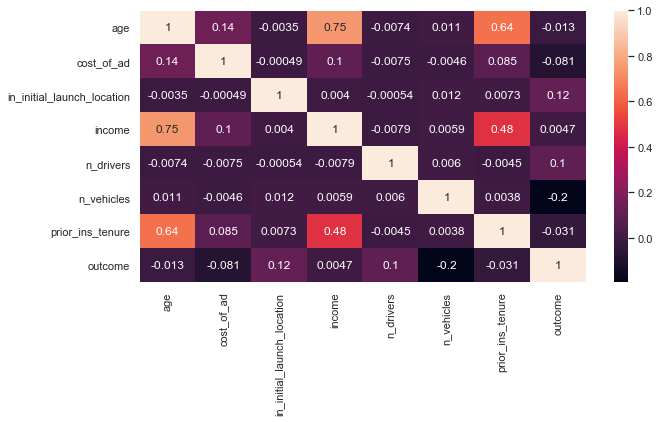

In [11]:
# Understanding the impact of each independent variable on the outcome. 
import seaborn as sns
%matplotlib inline
correlation = df_train.corr()
sns.set(rc={'figure.figsize':(10, 5)})
d=sns.heatmap(correlation, annot = True)
bottom, top = d.get_ylim()
d.set_ylim(bottom + 0.5, top - 0.5)

# of 1 cases: 973 (9.998972356386805)%
# of 0 cases: 8758 (90.0010276436132)%


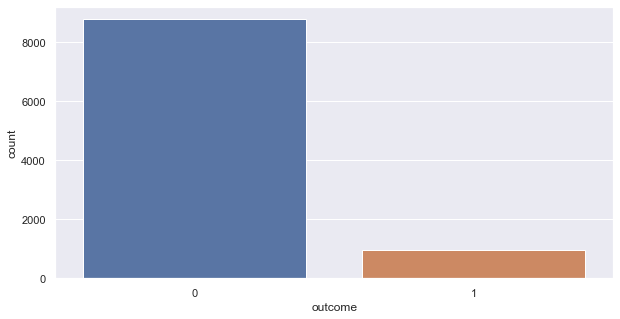

In [12]:
# Checking how the 0 and 1 cases are distributed (Class distribution)
case_1=df_train.loc[df_train['outcome']==1]
case_0=df_train.loc[df_train['outcome']==0]
print('# of 1 cases: %s (%s)%%'%(len(case_1),(len(case_1)/len(df_train))*100))
print('# of 0 cases: %s (%s)%%'%(len(case_0),(len(case_0)/len(df_train))*100))
sns.countplot(df_train['outcome'])

## Data Preprocessing

In [13]:
#Concatinating train and test data to preprocess data.
df = pd.concat([df_train, df_test], ignore_index=True)

C:\Users\banak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_G = LabelEncoder()
df['gender'] = labelencoder_G.fit_transform(df['gender'])

In [15]:
df['device_type'] = pd.get_dummies(df['device_type'])

In [16]:
# Separating the test and train datasets
processed_train = df.loc[df['outcome'].notna()]
processed_test = df.loc[df['outcome'].isna()]

In [17]:
processed_train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,outcome,prior_ins_tenure
0,56,0.005737,0,1,0,62717,2,1,0.0,4
1,50,0.004733,0,0,0,64328,2,3,0.0,2
2,54,0.004129,0,1,0,83439,1,3,0.0,7
3,16,0.005117,1,0,0,30110,2,3,0.0,0
4,37,0.003635,0,1,0,76565,2,1,0.0,5


(10.0, 0.0)

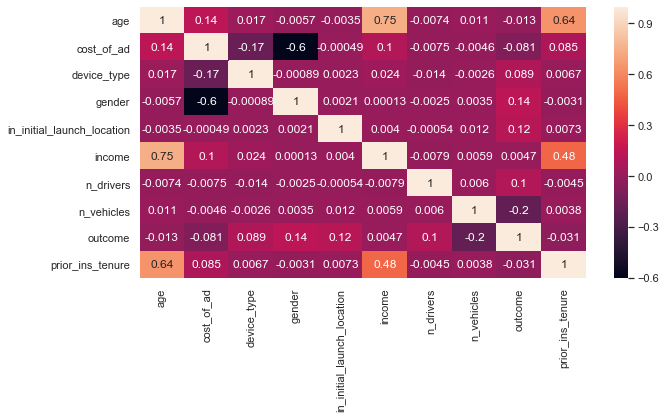

In [18]:
# Correlations after preprocesing 
import seaborn as sns
%matplotlib inline
correlation = processed_train.corr()
sns.set(rc={'figure.figsize':(10, 5)})
d=sns.heatmap(correlation, annot = True)
bottom, top = d.get_ylim()
d.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
outcome = processed_train['outcome']

In [20]:
processed_train = processed_train.drop(['outcome'], axis=1)

In [21]:
processed_train['outcome'] = outcome

In [22]:
processed_train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,0,1,0,62717,2,1,4,0.0
1,50,0.004733,0,0,0,64328,2,3,2,0.0
2,54,0.004129,0,1,0,83439,1,3,7,0.0
3,16,0.005117,1,0,0,30110,2,3,0,0.0
4,37,0.003635,0,1,0,76565,2,1,5,0.0


In [23]:
# Creating matrix of independent variables and dependent variable vector 
X = processed_train.iloc[:,:-1].values
y = processed_train['outcome']

# SMOTE Oversampling for Imbalanced Dataset along with random undersampling of the majority class.

In [24]:
# check version number
import imblearn
print(imblearn.__version__)

0.6.1


In [25]:
# class distribution
# Counter keeps the class distribution in dictionary form. 
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 8758, 1.0: 973})


In [26]:
# Splitting train data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 143)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(X_train)
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

## Naive Bayes Implementation

In [28]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB

# Implementation of grid search k value
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
    # defining the pipeline
    NBclassifier = GaussianNB()
    overNB = SMOTE(sampling_strategy=0.2, k_neighbors=k)
    underNB = RandomUnderSampler(sampling_strategy=0.5)
    stepsNB = [('over', overNB), ('under', underNB), ('model', NBclassifier)]
    pipelineNB = Pipeline(steps=stepsNB)
    # pipeline evaluation
    cvNB = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv=cvNB, n_jobs=-1)
    scoreNB = mean(scoresNB)
    print('For k=%d, the mean AUC: %.3f' % (k, scoreNB))

For k=1, the mean AUC: 0.802
For k=2, the mean AUC: 0.803
For k=3, the mean AUC: 0.803
For k=4, the mean AUC: 0.801
For k=5, the mean AUC: 0.802
For k=6, the mean AUC: 0.803
For k=7, the mean AUC: 0.802
For k=8, the mean AUC: 0.801
For k=9, the mean AUC: 0.803
For k=10, the mean AUC: 0.801


## Decision Tree Implementation

In [29]:
from sklearn.tree import DecisionTreeClassifier
for k in k_values:
    # define pipeline
    DTclassifier = DecisionTreeClassifier()
    overDT = SMOTE(sampling_strategy=0.2, k_neighbors=k)
    underDT = RandomUnderSampler(sampling_strategy=0.5)
    stepsDT = [('over', overDT), ('under', underDT), ('model', DTclassifier)]
    pipelineDT = Pipeline(steps=stepsDT)
    # pipeline evaluation
    cvDT = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoresDT = cross_val_score(pipelineDT, X_train, y_train, cv=cvDT, n_jobs=-1)
    scoreDT = mean(scoresDT)
    print('For k=%d, the Mean AUC: %.3f' % (k, scoreDT))

For k=1, the Mean AUC: 0.777
For k=2, the Mean AUC: 0.771
For k=3, the Mean AUC: 0.772
For k=4, the Mean AUC: 0.771
For k=5, the Mean AUC: 0.770
For k=6, the Mean AUC: 0.774
For k=7, the Mean AUC: 0.769
For k=8, the Mean AUC: 0.770
For k=9, the Mean AUC: 0.774
For k=10, the Mean AUC: 0.771


### Logistic Regression Implementation

In [30]:
from sklearn.linear_model import LogisticRegression
# grid search k value for SMOTE oversampling for imbalanced classification
for k in k_values:
    # pipeline
    LGclassifier = LogisticRegression(random_state=143)
    overLG = SMOTE(sampling_strategy=0.2, k_neighbors=k)
    underLG = RandomUnderSampler(sampling_strategy=0.5)
    stepsLG = [('over', overLG), ('under', underLG), ('model', LGclassifier)]
    pipelineLG = Pipeline(steps=stepsLG)
    # evaluation
    cvLG = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoresLG = cross_val_score(pipelineLG, X_train, y_train, cv=cvLG, n_jobs=-1)
    scoreLG = mean(scoresLG)
    print('For k=%d, Mean AUC: %.3f' % (k, scoreLG))

For k=1, Mean AUC: 0.825
For k=2, Mean AUC: 0.826
For k=3, Mean AUC: 0.826
For k=4, Mean AUC: 0.824
For k=5, Mean AUC: 0.825
For k=6, Mean AUC: 0.825
For k=7, Mean AUC: 0.824
For k=8, Mean AUC: 0.826
For k=9, Mean AUC: 0.826
For k=10, Mean AUC: 0.824


In [31]:
#LG1classifier = LogisticRegression(random_state=143)
overLG1 = SMOTE(sampling_strategy=0.2, k_neighbors=5)
underLG1 = RandomUnderSampler(sampling_strategy=0.5)
stepsLG1 = [('over', overLG1), ('under', underLG1), ('model', LGclassifier)]
pipelineLG1 = Pipeline(steps=stepsLG1)
pipelineLG1.fit(X_train,y_train)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipelineLG1, X_train, y_train, cv=cv, n_jobs=-1)
score = mean(scores)
print('With k=5, AUC: %.3f' % (score))

With k=5, AUC: 0.826


In [32]:
y_pred = LGclassifier.predict(X_test)

In [33]:
y_pred[0:5]

array([1., 0., 0., 0., 0.])

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

(2.0, 0.0)

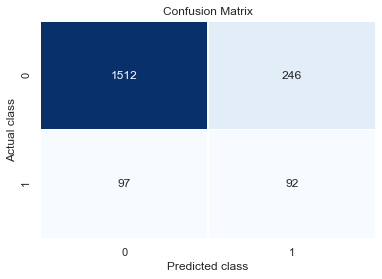

In [35]:
plt.figure(figsize=(6,4))
c=sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix")
bottom, top = c.get_ylim()
c.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
from sklearn.ensemble import RandomForestClassifier
for k in k_values:
    # define pipeline
    RFclassifier = RandomForestClassifier()
    overRF = SMOTE(sampling_strategy=0.2, k_neighbors=k)
    underRF = RandomUnderSampler(sampling_strategy=0.5)
    stepsRF = [('over', overRF), ('under', underRF), ('model', RFclassifier)]
    pipelineRF = Pipeline(steps=stepsRF)
    # pipeline evaluation
    cvRF = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoresRF = cross_val_score(pipelineRF, X_train, y_train, cv=cvRF, n_jobs=-1)
    scoreRF = mean(scoresRF)
    print('For k=%d, the Mean AUC: %.3f' % (k, scoreRF))

For k=1, the Mean AUC: 0.858
For k=2, the Mean AUC: 0.857
For k=3, the Mean AUC: 0.858
For k=4, the Mean AUC: 0.858
For k=5, the Mean AUC: 0.857
For k=6, the Mean AUC: 0.857
For k=7, the Mean AUC: 0.858
For k=8, the Mean AUC: 0.857
For k=9, the Mean AUC: 0.858
For k=10, the Mean AUC: 0.856


In [37]:
#LG1classifier = LogisticRegression(random_state=143)
RF1classifier = RandomForestClassifier()
overRF1 = SMOTE(sampling_strategy=0.2, k_neighbors=1)
underRF1 = RandomUnderSampler(sampling_strategy=0.5)
stepsRF1 = [('over', overRF1), ('under', underRF1), ('model', RF1classifier)]
pipelineRF1 = Pipeline(steps=stepsRF1)
pipelineRF1.fit(X_train,y_train)
# evaluate pipeline
cvRF1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoresRF1 = cross_val_score(pipelineRF1, X_train, y_train, cv=cvRF1, n_jobs=-1)
scoreRF1 = mean(scoresRF1)
print('With k=5, AUC: %.3f' % (scoreRF1))

With k=5, AUC: 0.861


In [38]:
RFy_pred = RF1classifier.predict(X_test)

In [39]:
RFy_pred[0:5]

array([1., 0., 0., 0., 0.])

# TEST

In [40]:
processed_test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,outcome,prior_ins_tenure
9731,34,0.005134,1,0,1,40376,1,3,NaN,7
9732,53,0.005223,0,0,1,84511,1,1,NaN,11
9733,46,0.004939,0,0,0,79322,1,1,NaN,4
9734,36,0.004924,1,0,0,63295,1,2,NaN,0
9735,28,0.005146,0,0,1,36170,1,3,NaN,3


In [41]:
processed_test = processed_test.drop(['outcome'], axis=1)

In [42]:
processed_test = sc_x.transform(processed_test)

In [43]:
# Logistic Regression prediction
test_pred = LGclassifier.predict(processed_test)

In [44]:
test_pred[0:5]

array([0., 0., 0., 0., 0.])

In [45]:
# Random Forest prediction
RFtest_pred = RF1classifier.predict(processed_test)

In [46]:
RFtest_pred[0:5]

array([0., 0., 0., 0., 0.])